# Ensemble methods

## 1. Importing the data

We'll use the same data set whe used in the last lab. The salary data set was extracted from the census bureau database and contains salary information. The goal is to use this data set and to try to draw conclusions regarding what drives salaries. More specifically, the target variable is categorical (> 50k; <= 50 k). Let's create a classification tree!

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import statsmodels as sm
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import graphviz 
from sklearn.tree import export_graphviz

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Our dataset is stored in the file `salaries_final.csv`.  

In the cell below, read in the dataset from this file and store it in a DataFrame.  Be sure to set the `index_col` parameter to `0`.  Then, display the head of the DataFrame to ensure that everything loaded correctly.

In [8]:
salaries = pd.read_csv('salaries_final.csv')

In [9]:
salaries.head()

,Unnamed: 0,Age,Education,Occupation,Relationship,Race,Sex,Target
0,0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In total, there are 6 predictors, and one outcome variable, the target salary <= 50k/ >50k.

recall that the 6 predictors are:

- `Age`: continuous.

- `Education`: Categorical. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, 
Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- `Occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- `Relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- `Race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- `Sex`: Female, Male.

In the last lab, we used the `patsy` library's `dmatrices` module to convert our categorical columns to a one-hot encoded format.  In this lab, we'll pandas to accomplish the same task.  

First, we'll need to store our target column in a separate variable and drop it from the dataset.  

Do this in the cell below. 

In [10]:
target = salaries.Target

In [11]:
salaries = salaries.drop('Target',axis =1)

Next, we'll want to confirm that the Age column is currently encoded in a numeric data type, and not a string. By default, pandas will treat all columns encoded as strings as categorical columns, and create a dummy column for each unique value contained within that column.  We do not want a separate column for each age, so let's double check that the age column is encoded as an integer or a float.  

In the cell below, check the `.dtypes` of the DataFrame to examine the data type of each column. 

In [12]:
salaries.dtypes

Unnamed: 0       int64
Age              int64
Education       object
Occupation      object
Relationship    object
Race            object
Sex             object
dtype: object

Great.  Now we're ready to create some dummy columns and deal with our categorical variables.  

In the cell below, use pandas to create dummy columns for each of categorical variables.  If you're unsure of how to do this, check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).  

In [14]:
data = pd.get_dummies(salaries,prefix = ['Education','Occupation','Relationship','Race','Sex'])

In [43]:
data = data.drop('Unnamed: 0',axis = 1)

Now, split your data and target into training and testing sets using the appropriate method from sklearn. 

In [45]:
data_train, data_test, target_train, target_test = train_test_split(data,target)

## 2. Let's rebuild a "regular" tree as a baseline

We'll begin by fitting a regular Decision Tree Classifier, so that we have something to compare our ensemble methods to.  

### 2.1 Building the tree

In the cell below, create a Decision Tree Classifier.  Set the `criterion` to `'gini'`, and a `max_depth` of `5`.  Then, fit the tree to our training data and labels.  

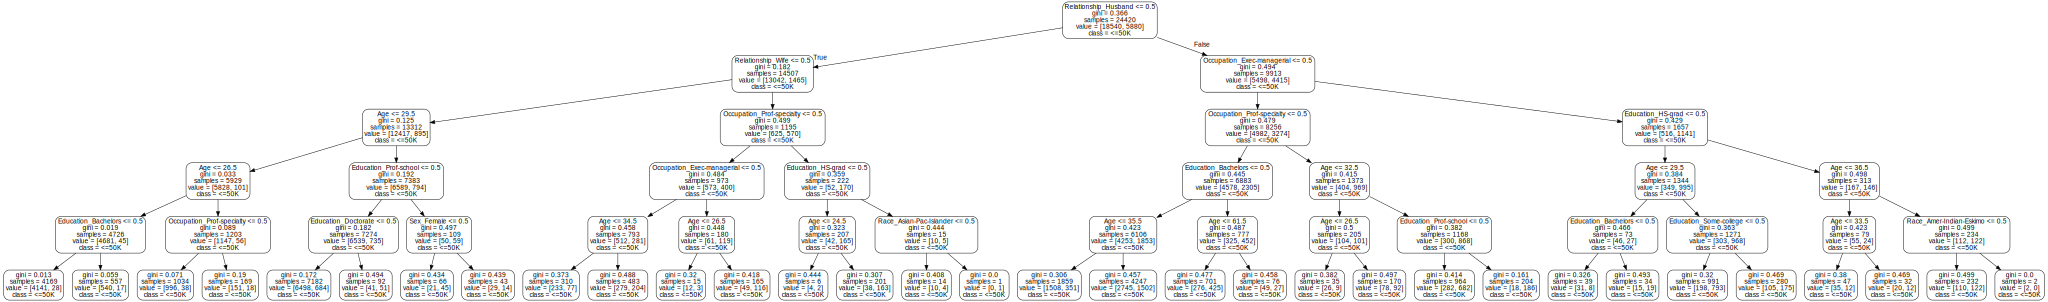

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion="gini",max_depth=5)
tree = tree_clf.fit(data_train, target_train)

# Optional--uncomment this code to visualize the Decision Tree
export_graphviz(tree, out_file="mytree.dot", feature_names=data_train.columns , class_names=list(target_train), rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 2.1 Feature importance

Let's quickly examine how important each feature ended up being in our Decision Tree model.  Check the `feature_importances_` attribute of our trained model to see what it displays. 

In [53]:
tree.feature_importances_

array([7.32384576e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.89373757e-02, 1.33322711e-02,
       1.53543772e-02, 0.00000000e+00, 0.00000000e+00, 1.93861520e-02,
       4.66632036e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.15655689e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25956091e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.86347718e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.28201489e-01, 3.81818549e-04, 3.31582738e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.30077754e-03,
       0.00000000e+00])

That matrix isn't very helpful, but a visualization of the data it contains could be.  Run the cell below to plot a visualization of the feature importances for this model. 

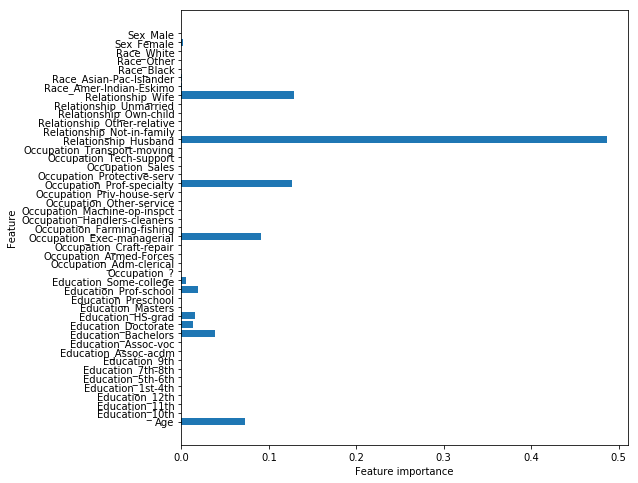

In [54]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

### 2.3 Model performance

As we did in the last lab, let's see how well our model performed on the data. 

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
# logreg.fit(X_train, y_train).decision_function(X_test)

In [57]:
pred = tree_clf.predict(data_test)
print(metrics.confusion_matrix(target_test, pred))
print(metrics.classification_report(target_test, pred))

[[5770  410]
 [1018  943]]
             precision    recall  f1-score   support

      <=50K       0.85      0.93      0.89      6180
       >50K       0.70      0.48      0.57      1961

avg / total       0.81      0.82      0.81      8141



In [58]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 82.46%


## 3. Bagged trees

The first Ensemble approach we'll try is a Bag of Trees.  This will make use of **_Bagging_**, along with a number of Decision Tree Classifier models.  

In the cell below, import `BaggingClassifier`, which can be found inside of sklearn's `ensemble` module. 

In [59]:
from sklearn.ensemble import BaggingClassifier

Now, create a `BaggingClassifier`.  In the first parameter spot, create a `DecisionTreeClassifier` and set the same parameters that we did above for `criterion` and `max_depth`.  Also set the `n_estimators` parameter for our Bagging Classifier to `20`. 

In [60]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion = 'gini', max_depth = 5), n_estimators=20)

Great! Now, fit it to our training data. 

In [61]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

Checking the accuracy of a model is such a common task that all (supervised learning) models contain a `score()` method that wraps the `accuracy_score` helper method we've been using.  All we have to do is pass it a dataset and the corresponding labels and it will return the accuracy score for those data/labels.  

Let's use it to get the training accuracy of our model. In the cell below, call the `.score()` method on our Bagging model and pass in our training data and training labels as parameters. 

In [62]:
bagged_tree.score(data_train, target_train)

0.8266175266175266

Now, let's check the accuracy score that really matters--our testing accuracy.  This time, pass in our testing data and labels to see how the model did.  

In [63]:
bagged_tree.score(data_test, target_test)

0.8247144085493182

## 4. Random forests

Another popular ensemble method is the **_Random Forest_** model.  Let's fit a Random Forest Classifier next and see how it measures up compared to all the others. 

### 4.1 Fitting a random forests model

In the cell below, import the `RandomForestClassifier` from sklearn's `ensemble` module. 

In [64]:
from sklearn.ensemble import RandomForestClassifier

In the cell below, create a `RandomForestClassifier`, and set the number estimators to `100` and the max depth to `5`. Then, fit the model to our training data. 

In [65]:
forest = RandomForestClassifier(n_estimators= 100, max_depth=100)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now, let's check the training and testing accuracy of the model using its `.score()` method.

In [67]:
forest.score(data_train,target_train)

0.9047502047502047

In [68]:
forest.score(data_test,target_test)

0.8017442574622282

### 4.2 Look at the feature importances

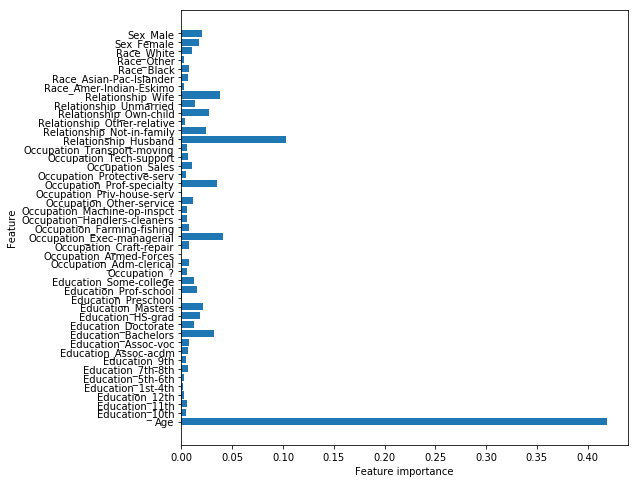

In [69]:
plot_feature_importances(forest)

Note: "relationship" represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship, so it is a bit of a weird attribute.

Also note that more features show up. This is a pretty typical result. 

### 4.3 Look at the trees in your forest

Let's create a forest with some small trees. You'll learn how to access trees in your forest!

In the cell below, create another `RandomForestClassifier`.  Set the number of estimators to 5, the `max_features` to 10, and the `max_depth` to 2.

In [72]:
forest_2 = RandomForestClassifier(max_features=10, max_depth=2, n_estimators=5)
forest_2.fit(data_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Making `max_features` smaller will lead to very different trees in your forest!

The trees in your forest are stored in the `.estimators_` attribute.

Run the cells below to examine 2 different trees from our new Random Forest Classifier.  

In [74]:
forest_2.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=108409639, splitter='best')

In [75]:
tree_1 = forest_2.estimators_[0]

As an optional step, uncomment the cells below to visualize the two trees from our Random Forest. 

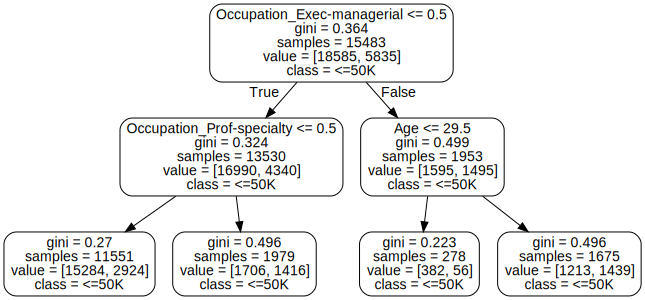

In [76]:
export_graphviz(tree_1, out_file="mytree.dot", feature_names=data_train.columns , class_names=list(target_train), rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

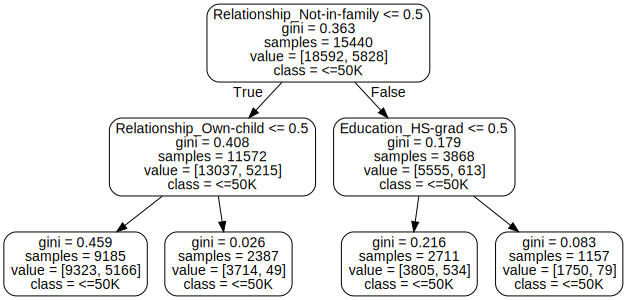

In [78]:
tree_2 = forest_2.estimators_[1] #.fit(data_train, target_train.iloc[:,1])
export_graphviz(tree_2, out_file="mytree.dot", feature_names=data_train.columns , class_names=list(target_train), rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 5. Gradient boosting

As a final step, we'll examine Gradient Boosted Trees. 

### 5.1 GBT 

#### 5.1.1 Fitting a GBT model

In the cell below, import `GradientBoostingClassifier` from sklearn's `ensemble` module.

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

Next, create a `GradientBoostingClassifier` and set the `max_depth` to 5 and the `learning_rate` to `0.01`.  Then, fit the model to our training data.

In [80]:
gradboost = GradientBoostingClassifier(max_depth=5, learning_rate=.01)
gradboost.fit(data_train, target_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Now, check the training and testing accuracy of our Gradient Boosted Model.  

In [81]:
gradboost.score(data_train, target_train)

0.8194103194103194

In [82]:
gradboost.score(data_test, target_test)

0.8159931212381771

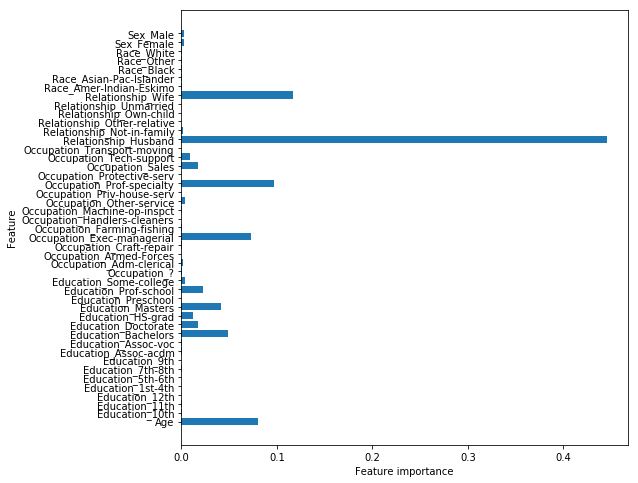

In [83]:
plot_feature_importances(gradboost)

Finally, plot the feature importance for the model. 

This isn't really an improvement compared to our Random forests. We told you that gradient boosting methods can generate excellent results, if you set your hyperparameters right! As you know, gradient descent is a delicate process and the learning rate should be set correctly. Let's have a look at what changing the learning rate does to our model.

#### 5.1.2 Changing the learning rate

We'll create another `GradientBoostingClassifier`.  Set the `max_depth` to `5`, and the `learning_rate` to `0.09`.  Then, fit the new model to our training data. 

In [84]:
gradboost_2 = GradientBoostingClassifier(max_depth=5, learning_rate=.09)
gradboost_2.fit(data_train, target_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.09, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Now, check the training and testing accuracy of this model. 

In [85]:
gradboost_2.score(data_train, target_train)

0.8438165438165438

In [87]:
gradboost_2.score(data_test, target_test)

0.8357695614789338

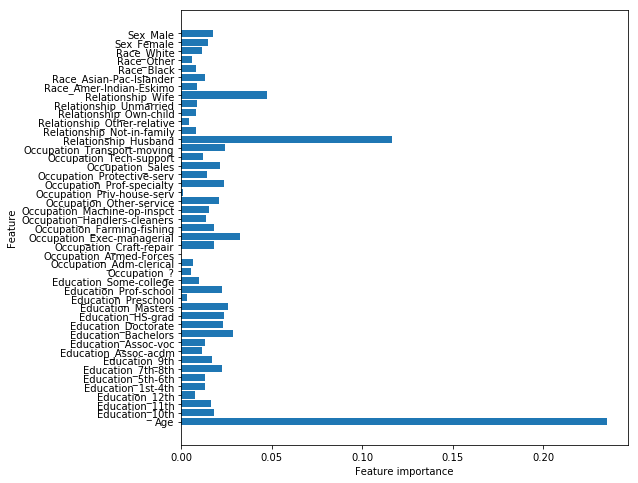

In [88]:
plot_feature_importances(gradboost_2)

Now, plot the feature importance. 

The feature importances plot has changed drastically! This model is definitely more complex, as mentioned in the lecture.

### 5.2 AdaBoost

We'll end this lab with AdaBoost, a popular variant of Gradient Boosted Trees.  

In the cell below, import `AdaBoostClassifier` from sklearn's `ensemble` module. 

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In the cell below, create an AdaBoost classifier. Set the number of estimators to `100`.  Then, fit the model to our training data. 

In [90]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(data_train, target_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

Now, check the training and testing accuracy of the model. 

In [91]:
adaboost.score(data_train, target_train)

0.8364864864864865

In [92]:
adaboost.score(data_test,target_test)

0.8340498710232158

Finally, plot the feature importances for our AdaBoost model. 

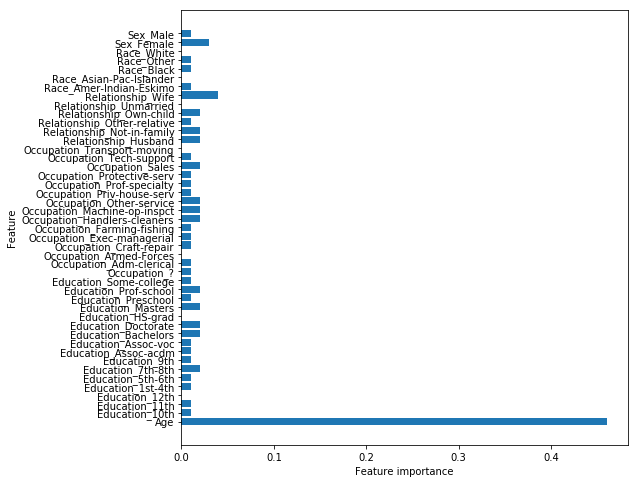

In [93]:
plot_feature_importances(adaboost)

Seems to be performing similarly to gradient boosting, even more focus on Age.

# Sources
https://www.svds.com/machine-learning-vs-statistics/ 

https://github.com/xbno/Projects/blob/master/Models_Scratch/Decision%20Trees%20from%20scratch.ipynb

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/ensemble.html


Raschka and Mirjalili

Muller and Guido


https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/